# KKRnano Tutorial

These notes aim to give a concise explanation on how to use the KKRnano plugin for AiiDA within the aiida-kkr package.
It is expected that the user is experienced with some of the Jülich KKR codes (juKKR). Their general documentation can be found in the [Wiki](https://iffgit.fz-juelich.de/kkr/jukkr/-/wikis/home) on iffgit (only accessible with FZJ credentials).


## Conceptual idea of KKRnano
KKRnano is a KKR code that is optimized for large supercell calculations by incoorperating Kohn's priciple of "Nearsightedness in Condensed Matter".

As any KKR DFT code it calculates the electron density from the Green function via  
$$\rho(\vec{r})=-\frac{1}{\pi} \operatorname{Im} \int_{-\infty}^{E_{F}} G(\vec{r}, \vec{r} ; E) d E.$$ 
To do so, the system is tesselated into atomic cells by a Voronoi construction.

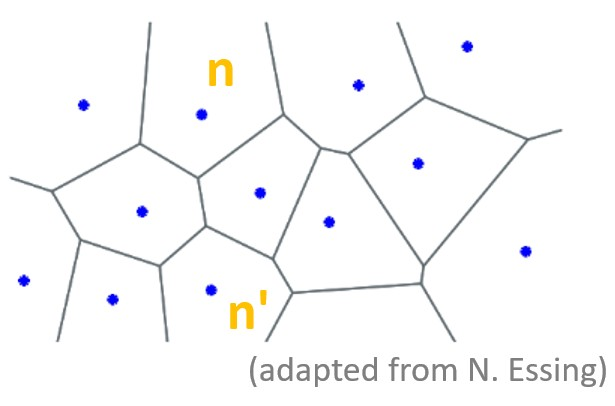
The site-angular momentum representation of the Green function for such a tesselated system reads:

$$ G\left(\vec{r}+\vec{R}^{n}, \vec{r}^{\prime}+\vec{R}^{n^{\prime}} ; E\right) = G_{n}\left(\vec{r}, \vec{r}^{\prime};E \right)\delta_{n n^{\prime}}+\sum_{L L^{\prime}} R_{L}^{n}(\vec{r} ; E) G_{L L^{\prime}}^{n n^{\prime}}(E) R_{L^{\prime}}^{n^{\prime}}\left(\vec{r}^{\prime} \right) .$$
Here, $n$,$n^{\prime}$ represent the site indices and $L \equiv (\ell, m)$.
The Green is found using the Dyson equation
$$G =G^{r}+G^{r} \Delta t G^{r}+G^{r} \Delta t G^{r} \Delta t G^{r}+\cdots,$$
where $\Delta t$ is the difference of the t-matrix for the reference system and the actual system.
Instead of using free space as a reference system whose Green function is analytically known, one uses a top hat potential for the atomic sites. This is because, the algebraic equation arising from the structure of the crystalline Green function can be turned into an equation involving only sparse matrices by realising that the decay of the easily obtained reference Green function is very rapid and therefore very distant contributions can be neglected. This results in quadratic scaling with respect to the number of atomic sites. This is sometimes called tight-binding KKR method and is used also in the other juKKR codes.

The scheme used by KKRnano takes the idea of rapidly decaying Green functions a step further by realizing that also the final Green function exhibits a fast decay (albeit slower than the one of the reference Green function). Thus, one can set a truncation radius as illustrated here (the thick lines represent the edge of the supercell, of course periodic boundary conditions apply):
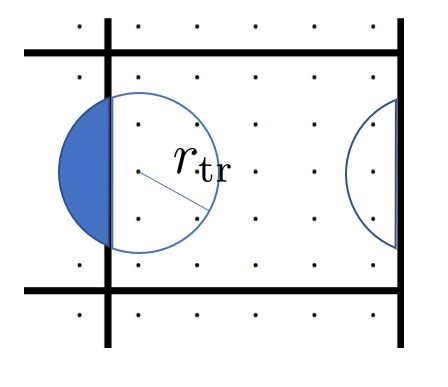

This way one can achieve an $O(N_\text{atoms})$ scheme.

Furthermore, with KKRnano one can use many features, that are also available in the KKRhost code like the more accurate Chebyshev solver for treating the non-spherical part of the potentital (`KORBIT = 1`) and (only together with the Chebyshev solver) also Spin-Orbit Coupling (SOC, `soc = t`). It is possible to calculate a site- and angular momentum-resolved Density of States (DOS). As of May 2022 a bandstructure calculation is however not implemented. Besides, more feautures are being added.


How to perform calculation can be found [here](https://iffgit.fz-juelich.de/kkr/jukkr/-/wikis/kkrnano/perform) (only accessible with FZJ credentials). An overview of the files required can be found [here](https://iffgit.fz-juelich.de/kkr/jukkr/-/wikis/kkrnano/prepare).

## AiiDA in general
#### General introduction

AiiDA is a Python library whose main objective is to facilitate the reproducibility of calculations by enabling the user to keep track of data provenance. This is implemented by a node structure:
![](https://iffmd.fz-juelich.de/uploads/upload_17dd1974cc702c720b842edc5d8734ba.png)

This node structure also extends to the code installation and its computer as code nodes and data node which are then stored in a database with a private key `pk` for the local database and a `uuid`  (universally unique identifier) that is globally unique.


A detailed tutorial for  AiiDA can be found at https://www.aiida.net/tutorials/.


For the use of the aiida-kkr plugin and its KKRnano plugin it is helpful to understand the following native AiiDA node types:

- `StructureData` objects, that store information like lattice, site coordinates and atom species (not unlike the corresponding objects in `pymatgen` and `ASE`, that one can also generate `StructureData` objects from)
- `Dict` objects, that turn Python's native `dict` into a node that can be stored in the database. This is useful (and used) for input nodes like **calculation parameters** and **outputs**
- `RemoteData` objects, which store links to the location (on the remote computer, like some HPC cluster) where the actual calculation was performed. In those directories, the bulk of the data is stored and they might be necessary to start a calculation from. Essentially everything that is not needed in the long run remains only stored in the **remote folder** and is not copied into a retrieved folder which are stored as 
- `FolderData` objects, which make the files that were copied to the local database folder accessible. In this **retrieved** folder all the vital files, that are supposed to be stored long term, are given
- `SinglefileData` objects, to store files like formatted **potential** files, etc. in the repository.

Furthermore, the node turned datatypes `Float`, `Bool`, etc. may appear.
#### User advice
Whether to run a code locally on your machine or on a cluster, heavily depends on how much computation time one expects the calculation to need. It should not be underestimated that copying and writing in a remote directory (AiiDA opens an SSH connection internally) is very time consuming. Hence, rapid calculations like `VoronoiCalculations` or the `convert` step of a KKRnano calculation (see below) are therefore more efficiently carried out if run locally.

## KKRnano in general



## aiida-kkr
There are already several plugins for the Jülich KKRcodes (see https://aiida-kkr.readthedocs.io/). The plugins provide an interface to automatically generate the necessary input files. The AiiDA infrastructure makes it then possible to start the calculation on the remote computer (taking care of the scheduler). In addition, the plugin also takes care of parsing the output files and store everythin essential in the database.

The general documentation of the juKKR codes can be found in the [Wiki](https://iffgit.fz-juelich.de/kkr/jukkr/-/wikis/hom) on iffgit (only accessible with FZJ credentials).


# Overview of the KKRnano Tutorial

* [Part 0: basic introduction to KKRnano](00_KKRnano_tutorial_basics.ipynb)
* [Part 1: starting KKRnano from Voronoi](01_KKRnano_tutorial_simple_calculation.ipynb)
* [Part 2: continuing KKRnano calculations](02_KKRnano_tutorial_continue_calculations.ipynb)
* [Part 3: use a KKRnano workflow](03_KKRnano_tutorial_DOSworkchain.ipynb)
* [Part 4: StrucWithPotData](04_KKRnano_tutorial_StrucWithPotData.ipynb)

# Prerequisites for running the KKRnano tutorial

* to import the existing calculations use `verdi arhive import KKRnano_tutorial_export.aiida`